In [1]:
import pyutils.plot_utils as plt_utils
from turb.lesgo_utils import lesgo_data
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import numpy as np

fig_dir = r'/home/zyou6474/Projects/ERI/notebooks/figures'


job_mark = 'steady_forward_'
from datetime import datetime
date_mark = datetime.today().strftime('%Y-%m-%d')

ModuleNotFoundError: No module named 'pyutils'

# Initial condition of Steady source 

IC is all zero and source is constant gaussian impulse at different location in x direction. (Select the IC to be zero because magnitude of source will be dependent on the time scale of CFD, so that in order to have a better understanding of how the plume evolve, it would be better to only introduce a steady source.)

write data into /home/zyou6474/tasks/steady_channel_flow/inputs/source.001
write data into /home/zyou6474/tasks/steady_channel_flow/inputs/source.002
write data into /home/zyou6474/tasks/steady_channel_flow/inputs/source.003


((<Figure size 800x400 with 4 Axes>,
  [<Axes: xlabel='x', ylabel='y'>,
   <Axes: xlabel='x', ylabel='z'>,
   <Axes: xlabel='y', ylabel='z'>]),
 array([[[7.09756484e-152, 9.03850886e-152, 1.16010681e-151, ...,
          1.29768707e-150, 4.07580862e-151, 1.19500223e-151],
         [3.15710824e-150, 4.02047060e-150, 5.16033715e-150, ...,
          5.77231577e-149, 1.81298364e-149, 5.31555747e-150],
         [1.32223298e-148, 1.68381899e-148, 2.16120812e-148, ...,
          2.41751175e-147, 7.59298251e-148, 2.22621616e-148],
         ...,
         [1.32223298e-148, 1.68381899e-148, 2.16120812e-148, ...,
          2.41751175e-147, 7.59298251e-148, 2.22621616e-148],
         [3.15710824e-150, 4.02047060e-150, 5.16033715e-150, ...,
          5.77231577e-149, 1.81298364e-149, 5.31555747e-150],
         [7.09756484e-152, 9.03850886e-152, 1.16010681e-151, ...,
          1.29768707e-150, 4.07580862e-151, 1.19500223e-151]],
 
        [[1.62694994e-147, 2.07186574e-147, 2.65927221e-147, ...,
     

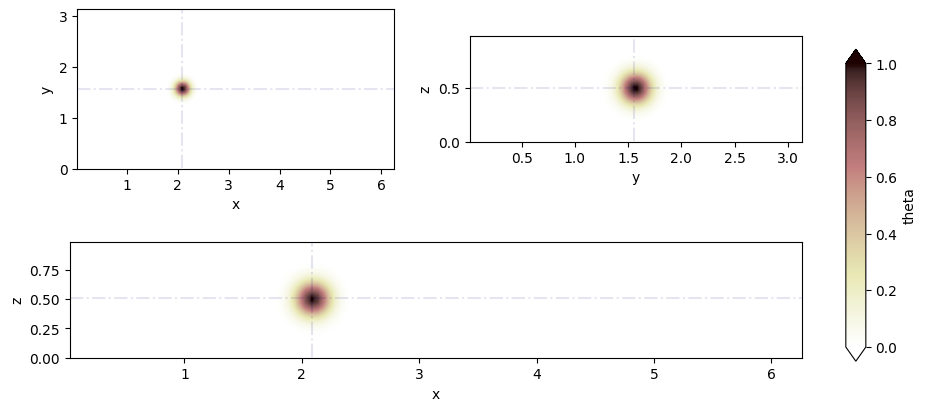

In [2]:
root_dir = '/home/zyou6474/tasks/steady_channel_flow'
dims = [128, 128, 64]
domain = [2*np.pi, np.pi, 1]
tspan = 3000

ldata = lesgo_data(domain, dims, root_dir, ntheta=3)
ldata.set_adjoint(False, fmt_ntheta='%.3i')

ldata.gaussian_field(fieldname = 'source', nk=1, source_point = [np.pi*1/3, np.pi/2, 1/2], gen_fig=False, variance=1e-1)
ldata.gaussian_field(fieldname = 'source', nk=2, source_point = [np.pi*1/2, np.pi/2, 1/2], gen_fig=False, variance=1e-1)
ldata.gaussian_field(fieldname = 'source', nk=3, source_point = [np.pi*2/3, np.pi/2, 1/2], gen_fig=True, variance=1e-1)

In [3]:
ldata.constant_field(fieldname = 'theta.IC', nk=1, gen_fig=False)
ldata.constant_field(fieldname = 'theta.IC', nk=2, gen_fig=False)
ldata.constant_field(fieldname = 'theta.IC', nk=3, gen_fig=False)

write data into /home/zyou6474/tasks/steady_channel_flow/inputs/theta.IC.001
write data into /home/zyou6474/tasks/steady_channel_flow/inputs/theta.IC.002
write data into /home/zyou6474/tasks/steady_channel_flow/inputs/theta.IC.003


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [4]:
t_ind = tspan
k_ind = 1
var_ind = 'theta'
timestep = np.linspace(0, tspan, 51)

ldata.read_data(t_ind)

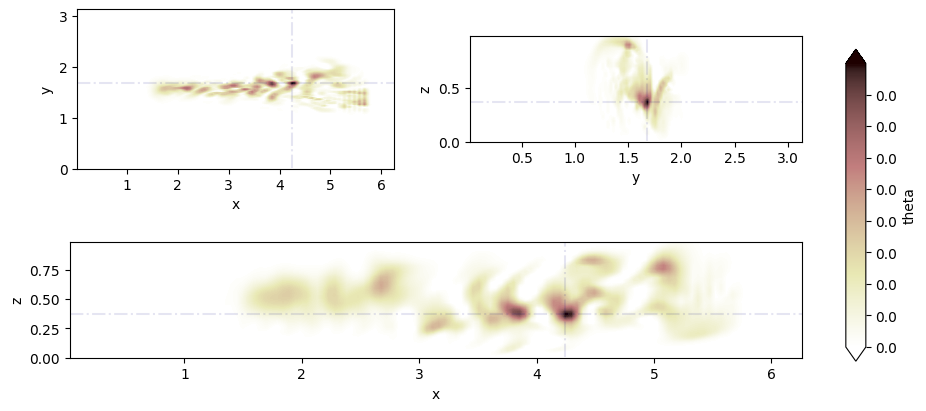

In [5]:
fig, ax = plt_utils.contour_channel(ldata.coords, ldata.data[var_ind][k_ind])

In [6]:
plt_utils.generate_gif(timestep, ldata, fig_dir, var_ind, k_ind, job_mark+date_mark, vmin=0, vmax=5e-2, norm = colors.Normalize, levels=51, tick_fmt='%.2f')

In [7]:
timestep[0] += 10
plt_utils.generate_gif(timestep, ldata, fig_dir, var_ind, k_ind, job_mark+date_mark+'_lognorm', vmin=1e-5, vmax=1e0, norm = colors.LogNorm, levels=101, tick_fmt='%.0e')

/home/zyou6474/.venv/lib/python3.10/site-packages/python_utils-0.1.0-py3.10.egg/pyutils/plot_utils.py:149: UserWarning: Log scale: values of z <= 0 have been masked
/home/zyou6474/.venv/lib/python3.10/site-packages/python_utils-0.1.0-py3.10.egg/pyutils/plot_utils.py:159: UserWarning: Log scale: values of z <= 0 have been masked
/home/zyou6474/.venv/lib/python3.10/site-packages/python_utils-0.1.0-py3.10.egg/pyutils/plot_utils.py:169: UserWarning: Log scale: values of z <= 0 have been masked


/home/zyou6474/.venv/lib/python3.10/site-packages/python_utils-0.1.0-py3.10.egg/turb/lesgo_utils.py:361: UserWarning: Log scale: values of z <= 0 have been masked
/home/zyou6474/.venv/lib/python3.10/site-packages/matplotlib/contour.py:1459: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


ValueError: math domain error

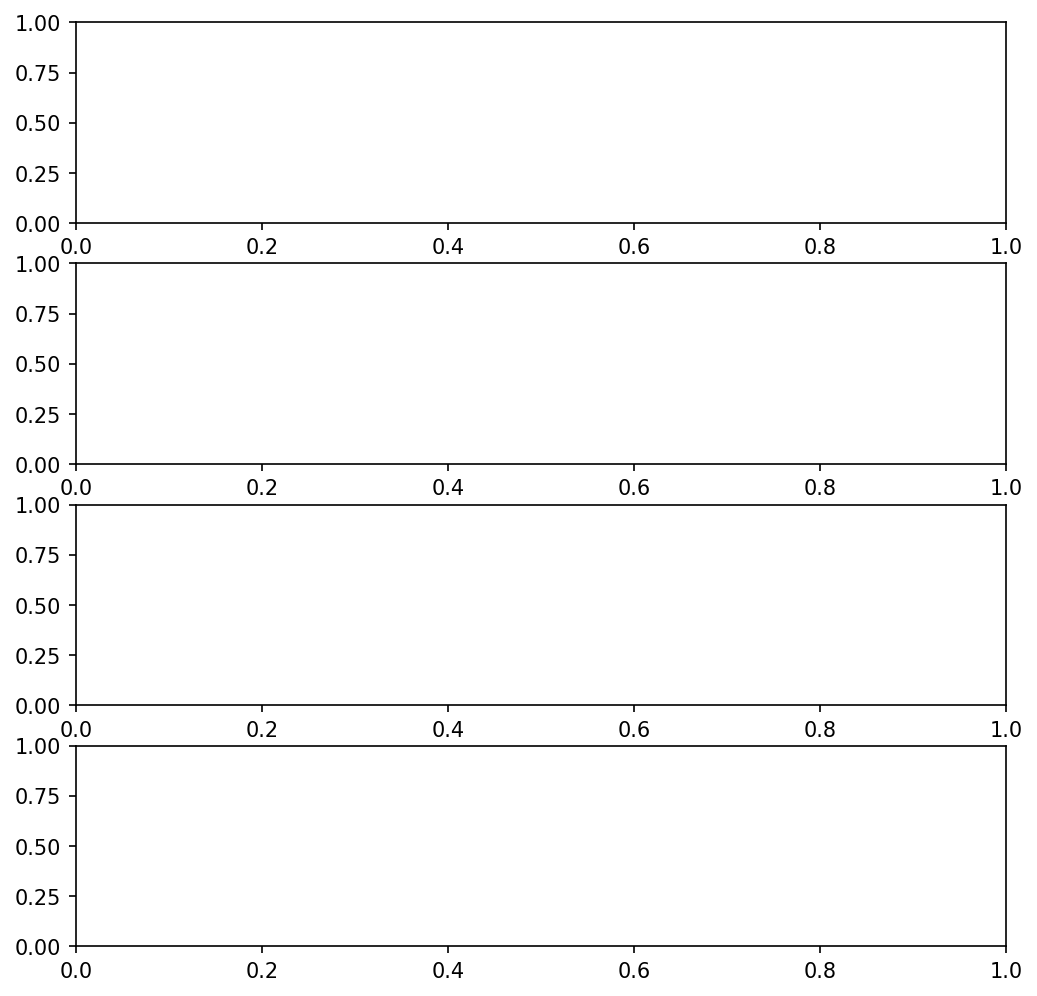

In [8]:
sx = (5/3*np.pi, 5/3*np.pi, 5/3*np.pi)
sy = (1/2*np.pi, 1/2*np.pi, 1/2*np.pi)
sz = (1/2, 1/3, 2/3)

sensor_locs = (sx, sy, sz)
tt = np.arange(0, 5000, 100)
ldata.sensor_measurements(sensor_locs, tt, vmin=1e-8, vmax=1e-1, norm=colors.LogNorm, 
                          gif_fname='/home/zyou6474/Projects/ERI/notebooks/figures/steady_forward_3sensors_lognorm')

Sensor measurement could be illustrated in this figure.

![](/home/zyou6474/Projects/ERI/notebooks/figures/stead_forward_3sensors_2023_07_05.gif)

# Adjoint Field of Sensors


In [ ]:
adjoint_dir = '/home/zyou6474/tasks/adjoint_steady_channel_flow'

ldata.set_adjoint(True, adjoint_dir=adjoint_dir, fmt_ntheta='%.3i')

# Write np.roll to write IC files
ldata.sensor_init_(sensor_locs)

# ldata.sensor_field()
# ldata.sensor_field(field_func = ldata.constant_field, fieldname='theta.IC')